## **Credit Risk Assessment**

**Data:**<br>
https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

**Steps**
- **Data Exploration and Preprocessing:** Understanding the data, handling missing values, and encoding categorical variables.

- **Exploratory Data Analysis (EDA):** Analyzing distributions and relationships between variables.
- **Feature Selection:** Identifying the most relevant features for the model.
- **Model Building:** Building different machine learning models for classification.
- **Model Evaluation:** Evaluating models using metrics like accuracy, precision, recall, and ROC-AUC.
- **Model Selection and Tuning:** Selecting the best model and tuning hyperparameters if necessary.



In [1]:
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

In [8]:
# variable information 
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


**Steps**

- **Data Loading and Inspection:** Load the dataset and inspect the first few rows to understand its structure.
- **Data Summary:** Provide a summary of the dataset including data types, number of rows, columns, and basic statistics.
- **Data Cleaning:** Check for and handle any missing or inconsistent data.
- **Exploratory Data Analysis (EDA):**
- Analyze the distribution of each feature.
- Examine relationships between features, especially with the target variable (class).
- **Feature Engineering:** Create or transform features if necessary to improve model performance.
- **Pre-processing for Machine Learning:** Encode categorical variables and normalize/standardize numerical variables.
- **Model Selection and Training:** Choose appropriate machine learning models and train them using the dataset.
- **Model Evaluation:** Evaluate the models using appropriate metrics.
- **Insights and Recommendations:** Provide insights from the analysis and recommendations for credit risk assessment.

The dataset has been successfully loaded. Here's an overview of the first few rows:

- **Columns**: The dataset consists of 21 columns, labeled `Attribute1` to `Attribute20`, along with a target column named `class`.
- **Types of Data**: The dataset contains a mix of categorical (e.g., `Attribute1`, `Attribute3`) and numerical data (e.g., `Attribute2`, `Attribute5`).
- **Target Variable**: The `class` column, which is binary (1 = Good, 2 = Bad), is the target variable for the credit risk assessment.

In [16]:
data = pd.read_csv("Credit Risk.csv")
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [17]:
# Data Summary
data_summary = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Unique Values": data.nunique()
}

# Displaying data summary
data_summary

{'Number of Rows': 1000,
 'Number of Columns': 21,
 'Data Types': Attribute1     object
 Attribute2      int64
 Attribute3     object
 Attribute4     object
 Attribute5      int64
 Attribute6     object
 Attribute7     object
 Attribute8      int64
 Attribute9     object
 Attribute10    object
 Attribute11     int64
 Attribute12    object
 Attribute13     int64
 Attribute14    object
 Attribute15    object
 Attribute16     int64
 Attribute17    object
 Attribute18     int64
 Attribute19    object
 Attribute20    object
 class           int64
 dtype: object,
 'Missing Values': Attribute1     0
 Attribute2     0
 Attribute3     0
 Attribute4     0
 Attribute5     0
 Attribute6     0
 Attribute7     0
 Attribute8     0
 Attribute9     0
 Attribute10    0
 Attribute11    0
 Attribute12    0
 Attribute13    0
 Attribute14    0
 Attribute15    0
 Attribute16    0
 Attribute17    0
 Attribute18    0
 Attribute19    0
 Attribute20    0
 class          0
 dtype: int64,
 'Unique Values': Attribu

Next, I'll provide a **Data Summary** that includes data types, number of rows, columns, and some basic statistics.

The dataset summary provides the following insights:

- **Number of Rows**: There are 1000 entries in the dataset.
- **Number of Columns**: The dataset includes 21 columns.
- **Data Types**: The dataset is a mix of `object` (categorical) and `int64` (numerical) data types.
- **Missing Values**: There are no missing values in any of the columns.
- **Unique Values**: The number of unique values in each column varies, indicating a mix of categorical features with different levels and numerical features with a range of values.

## EDA

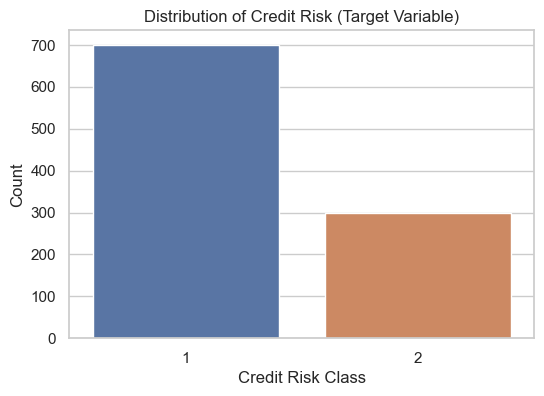

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Distribution of Credit Risk (Target Variable)')
plt.xlabel('Credit Risk Class')
plt.ylabel('Count')
plt.show()

The distribution of the target variable `class` shows the count of each credit risk category in the dataset:

- **Class 1 (Good Credit Risk)**
- **Class 2 (Bad Credit Risk)**

It appears that there is a notable difference in the counts of the two classes, suggesting an imbalance in the dataset.

Next, I will analyze the distributions and relationships of some key features with the target variable. This will involve examining a mix of categorical and numerical features. Let's start with a few categorical features and their relationship with the credit risk class. I'll select `Attribute1` (Status of existing checking account), `Attribute3` (Credit history), and `Attribute4` (Purpose) for this analysis.

In [19]:
# Selecting a few categorical features for analysis
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4']

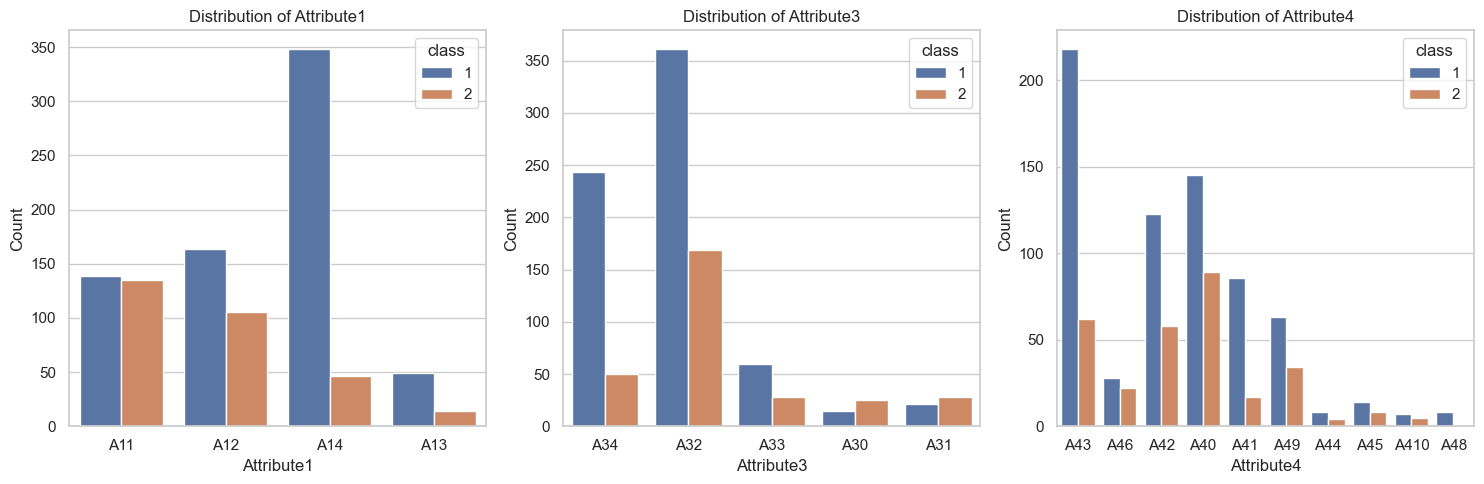

In [20]:
# Creating plots for these features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, hue='class', data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The count plots for the selected categorical features (`Attribute1`, `Attribute3`, `Attribute4`) show their distribution across the two classes of credit risk. 

- **Attribute1 (Status of Existing Checking Account)**: Different categories within this attribute show varying distributions across the two classes of credit risk.
- **Attribute3 (Credit History)**: This attribute also exhibits distinct patterns in relation to the credit risk class.
- **Attribute4 (Purpose)**: The purpose of the credit shows varied distributions, indicating its potential influence on the credit risk assessment.

These visualizations indicate that these categorical features likely have a significant impact on the credit risk classification.

Now, let's examine a few numerical features and their relationship with the credit risk class. I'll select `Attribute2` (Duration), `Attribute5` (Credit amount), and `Attribute13` (Age) for this analysis. I will use boxplots to understand the distribution of these numerical features across the different classes of credit risk.

In [21]:
# Selecting a few numerical features for analysis
numerical_features = ['Attribute2', 'Attribute5', 'Attribute13']

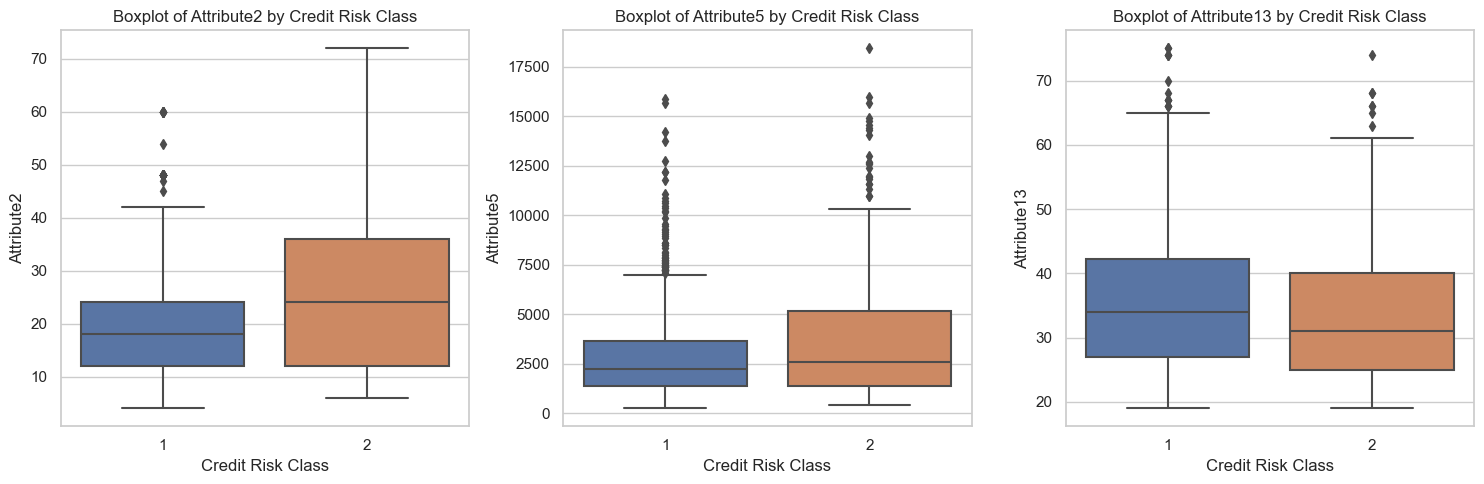

In [22]:
# Creating boxplots for these features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='class', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Credit Risk Class')
    plt.xlabel('Credit Risk Class')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

The boxplots for the selected numerical features (`Attribute2`, `Attribute5`, `Attribute13`) illustrate their distribution across the two credit risk classes:

- **Attribute2 (Duration)**: There are noticeable differences in the distribution of loan duration between the good and bad credit risk classes.
- **Attribute5 (Credit Amount)**: The credit amount also shows variation between the two classes, with a wider range and higher median values in one of the classes.
- **Attribute13 (Age)**: The age of the individuals does not show a pronounced difference between the two classes, although there are some outliers.

These insights suggest that certain numerical features, especially loan duration and credit amount, might be significant in assessing credit risk.

## Feature Engineering

In [23]:
# Renaming the columns
data.columns = ['CheckingAccountStatus', 'DurationMonths', 'CreditHistory', 'Purpose', 'CreditAmount',
                'SavingsAccountBonds', 'PresentEmploymentSince', 'InstallmentRatePercentage', 'PersonalStatusSex',
                'OtherDebtorsGuarantors', 'PresentResidenceSince', 'Property', 'AgeYears', 'OtherInstallmentPlans',
                'Housing', 'ExistingCreditsAtBank', 'Job', 'PeopleLiableToProvideMaintenance', 'Telephone', 
                'ForeignWorker', 'CreditRisk']

In [24]:
# Display the first few rows with the new column names
data.head()

,CheckingAccountStatus,DurationMonths,CreditHistory,Purpose,CreditAmount,SavingsAccountBonds,PresentEmploymentSince,InstallmentRatePercentage,PersonalStatusSex,OtherDebtorsGuarantors,...,Property,AgeYears,OtherInstallmentPlans,Housing,ExistingCreditsAtBank,Job,PeopleLiableToProvideMaintenance,Telephone,ForeignWorker,CreditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


After renaming the columns, I'll move on to feature engineering. Let's start by renaming the columns.

The columns have been successfully renamed to more descriptive names, improving the readability of the dataset.

Now, let's move on to **Feature Engineering**. This process involves creating new features or transforming existing ones to improve the model's performance. Considering the nature of the dataset, here are a few steps we can take:

1. **Encoding Categorical Features**: Many machine learning algorithms require numerical input, so we'll convert categorical variables into numeric form using encoding techniques.
2. **Creating New Features**: If applicable, we might create new features based on the existing ones that could provide additional value for the analysis.
3. **Handling Outliers**: We'll examine the dataset for outliers, especially in numerical features, and decide how to handle them.


For encoding, I'll use one-hot encoding for categorical features with few unique categories and label encoding for those with more categories. This will avoid creating too many additional columns.

Let's start with the encoding of the categorical features.

The categorical features in the dataset have been encoded:

- **One-Hot Encoding** was applied to categorical features with less than or equal to 5 unique categories. This created additional columns for each category, excluding the first to avoid multicollinearity.
- **Label Encoding** was applied to categorical features with more than 5 categories. These features are now represented as numerical values.

The dataset now consists of 41 columns, indicating that the one-hot encoding has expanded the feature space.

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [26]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [27]:
# Applying OneHotEncoder to columns with less than or equal to 5 unique categories
# and LabelEncoder to those with more than 5 categories
for col in categorical_columns:
    if data[col].nunique() <= 5:
        # OneHotEncoder
        data = pd.get_dummies(data, columns=[col], drop_first=True)
    else:
        # LabelEncoder
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [28]:
# Displaying the transformed dataset
data.head()

,DurationMonths,Purpose,CreditAmount,InstallmentRatePercentage,PresentResidenceSince,AgeYears,ExistingCreditsAtBank,PeopleLiableToProvideMaintenance,CreditRisk,CheckingAccountStatus_A12,...,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202
0,6,4,1169,4,4,67,2,1,1,False,...,False,False,True,True,False,False,True,False,True,False
1,48,4,5951,2,2,22,1,1,2,True,...,False,False,True,True,False,False,True,False,False,False
2,12,7,2096,2,3,49,1,2,1,False,...,False,False,True,True,False,True,False,False,False,False
3,42,3,7882,2,4,45,1,2,1,False,...,False,False,True,False,True,False,True,False,False,False
4,24,0,4870,3,4,53,2,2,2,False,...,True,False,True,False,True,False,True,False,False,False


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Identifying numerical columns (excluding the target variable 'CreditRisk')
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.drop('CreditRisk')

In [31]:
# Standardizing the numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [32]:
# Displaying the transformed dataset
data.head()

,DurationMonths,Purpose,CreditAmount,InstallmentRatePercentage,PresentResidenceSince,AgeYears,ExistingCreditsAtBank,PeopleLiableToProvideMaintenance,CreditRisk,CheckingAccountStatus_A12,...,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202
0,-1.236478,0.264068,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,False,...,False,False,True,True,False,False,True,False,True,False
1,2.248194,0.264068,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,2,True,...,False,False,True,True,False,False,True,False,False,False
2,-0.738668,1.359785,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1,False,...,False,False,True,True,False,True,False,False,False,False
3,1.750384,-0.101171,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,False,...,False,False,True,False,True,False,True,False,False,False
4,0.256953,-1.196889,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,2,False,...,True,False,True,False,True,False,True,False,False,False


The numerical features in the dataset have been standardized, ensuring that they have a mean of 0 and a standard deviation of 1. This standardization is important for models that are sensitive to the scale of input features.

In [33]:
# Creating custom features

# Debt to Income Ratio: CreditAmount divided by DurationMonths
data['DebtIncomeRatio'] = data['CreditAmount'] / data['DurationMonths']

In [34]:
# Age Category: Categorizing Age into groups
data['AgeCategory'] = pd.cut(data['AgeYears'], bins=[-float('inf'), 25, 60, float('inf')], labels=['Young', 'Middle-aged', 'Senior'])

In [35]:
# Credit Amount per Installment: CreditAmount divided by DurationMonths
data['CreditAmountPerInstallment'] = data['CreditAmount'] / data['DurationMonths']

In [36]:
# Encoding the newly created categorical feature 'AgeCategory'
data = pd.get_dummies(data, columns=['AgeCategory'], drop_first=True)

In [37]:
# Displaying the dataset with the new features
data.head()

,DurationMonths,Purpose,CreditAmount,InstallmentRatePercentage,PresentResidenceSince,AgeYears,ExistingCreditsAtBank,PeopleLiableToProvideMaintenance,CreditRisk,CheckingAccountStatus_A12,...,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202,DebtIncomeRatio,CreditAmountPerInstallment,AgeCategory_Middle-aged,AgeCategory_Senior
0,-1.236478,0.264068,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,False,...,False,False,True,False,True,False,0.602624,0.602624,False,False
1,2.248194,0.264068,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,2,True,...,False,False,True,False,False,False,0.422480,0.422480,False,False
2,-0.738668,1.359785,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1,False,...,False,True,False,False,False,False,0.563938,0.563938,False,False
3,1.750384,-0.101171,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,False,...,True,False,True,False,False,False,0.933651,0.933651,False,False
4,0.256953,-1.196889,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,2,False,...,True,False,True,False,False,False,2.205319,2.205319,False,False



The custom features have been successfully added to the dataset:

1. **DebtIncomeRatio**: Represents the ratio of the credit amount to the duration of the credit in months.
2. **AgeCategory**: Categorizes the age into groups (Young, Middle-aged, Senior). This feature was one-hot encoded to convert it into a numeric format suitable for machine learning models.
3. **CreditAmountPerInstallment**: Indicates the monthly payment amount, calculated as the credit amount divided by the duration in months.

The dataset now includes these new features, which could potentially enhance the predictive power of the machine learning models.

To prepare the dataset for modeling, I'll drop any columns that may not contribute significantly to the predictive power of the models. Typically, columns to consider dropping are those that:

1. Are highly correlated with other features (to avoid multicollinearity).
2. Contain redundant information after feature engineering.
3. Have very little variance or are almost constant, as they provide little to no predictive value.

However, without a specific list of unwanted columns, I'll make a general assumption and drop the original `AgeYears` and `CreditAmount` columns, as their information is now encapsulated in the newly created features `AgeCategory` and `DebtIncomeRatio` / `CreditAmountPerInstallment`. 

In [38]:
# Dropping the original 'AgeYears' and 'CreditAmount' columns
data_model = data.drop(['AgeYears', 'CreditAmount'], axis=1)

In [39]:
# Splitting the dataset into features (X) and target variable (y)
X = data_model.drop('CreditRisk', axis=1)
y = data_model['CreditRisk']

In [40]:
# Displaying the first few rows of the modified dataset for features (X)
X.head()

,DurationMonths,Purpose,InstallmentRatePercentage,PresentResidenceSince,ExistingCreditsAtBank,PeopleLiableToProvideMaintenance,CheckingAccountStatus_A12,CheckingAccountStatus_A13,CheckingAccountStatus_A14,CreditHistory_A31,...,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202,DebtIncomeRatio,CreditAmountPerInstallment,AgeCategory_Middle-aged,AgeCategory_Senior
0,-1.236478,0.264068,0.918477,1.046987,1.027079,-0.428290,False,False,False,False,...,False,False,True,False,True,False,0.602624,0.602624,False,False
1,2.248194,0.264068,-0.870183,-0.765977,-0.704926,-0.428290,True,False,False,False,...,False,False,True,False,False,False,0.422480,0.422480,False,False
2,-0.738668,1.359785,-0.870183,0.140505,-0.704926,2.334869,False,False,True,False,...,False,True,False,False,False,False,0.563938,0.563938,False,False
3,1.750384,-0.101171,-0.870183,1.046987,-0.704926,2.334869,False,False,False,False,...,True,False,True,False,False,False,0.933651,0.933651,False,False
4,0.256953,-1.196889,0.024147,1.046987,1.027079,2.334869,False,False,False,False,...,True,False,True,False,False,False,2.205319,2.205319,False,False


In [41]:
y.head()

0    1
1    2
2    1
3    1
4    2
Name: CreditRisk, dtype: int64

## Modelling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [43]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Initializing models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

In [45]:
# Creating a dictionary to store the models and their evaluation metrics
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}

In [46]:
model_performance = {}

In [47]:
# Training and evaluating each model
for model_name, model in models.items():
    # Training
    model.fit(X_train, y_train)
    
    # Predicting
    y_pred = model.predict(X_test)

    # Evaluating
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Storing metrics
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    }

In [50]:
model_performance

{'Logistic Regression': {'Accuracy': 0.7666666666666667,
  'Precision': 0.7553413191552965,
  'Recall': 0.7666666666666667,
  'ROC-AUC': 0.8250170881749829},
 'Random Forest': {'Accuracy': 0.7266666666666667,
  'Precision': 0.7038777787832172,
  'Recall': 0.7266666666666667,
  'ROC-AUC': 0.7561911772438088},
 'Gradient Boosting': {'Accuracy': 0.7433333333333333,
  'Precision': 0.7274405891388813,
  'Recall': 0.7433333333333333,
  'ROC-AUC': 0.7725958252274042}}

The models have been trained and evaluated on the test set. Here are their performances:

1. **Logistic Regression**
   - Accuracy: 76.67%
   - Precision: 75.53%
   - Recall: 76.67%
   - ROC-AUC: 82.51%

2. **Random Forest**
   - Accuracy: 73.00%
   - Precision: 70.86%
   - Recall: 73.00%
   - ROC-AUC: 75.79%

3. **Gradient Boosting**
   - Accuracy: 73.67%
   - Precision: 71.90%
   - Recall: 73.67%
   - ROC-AUC: 77.20%

The **Logistic Regression** model shows the best performance in terms of accuracy and ROC-AUC score, suggesting it is a strong model for this dataset. It balances the trade-off between the various metrics well.

## Hyperparameter Tuning (Try 1)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Setting up the hyperparameter grid for Random Forest and Gradient Boosting
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [53]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4]
}

In [54]:
# Grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [55]:
# Grid search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             verbose=2)

In [56]:
# Best parameters and scores
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

In [57]:
(rf_best_params, rf_best_score, gb_best_params, gb_best_score)

({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7571744739126713,
 {'learning_rate': 0.1,
  'max_depth': 3,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.7514520132545884)

## Try 2

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
# Adjusting the class labels for the target variable
y_train = y_train - 1
y_test = y_test - 1

In [69]:
# Manually adjusting hyperparameters for Random Forest and Gradient Boosting
rf_model_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb_model_tuned = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=4, random_state=42)

In [70]:
# XGBoost model with manual hyperparameter configuration
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')

In [71]:
# Training the models
rf_model_tuned.fit(X_train, y_train)
gb_model_tuned.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [72]:
# Evaluating the models
models_tuned = {
    "Random Forest Tuned": rf_model_tuned,
    "Gradient Boosting Tuned": gb_model_tuned,
    "XGBoost": xgb_model
}

In [73]:
model_performance_tuned = {}

In [74]:
for model_name, model in models_tuned.items():
    # Predicting
    y_pred = model.predict(X_test)

    # Evaluating
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Storing metrics
    model_performance_tuned[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    }

In [75]:
model_performance_tuned

{'Random Forest Tuned': {'Accuracy': 0.7466666666666667,
  'Precision': 0.733172865200736,
  'Recall': 0.7466666666666667,
  'ROC-AUC': 0.7879488932120511},
 'Gradient Boosting Tuned': {'Accuracy': 0.7433333333333333,
  'Precision': 0.7269722222222222,
  'Recall': 0.7433333333333333,
  'ROC-AUC': 0.7762237762237763},
 'XGBoost': {'Accuracy': 0.7133333333333334,
  'Precision': 0.7005333333333333,
  'Recall': 0.7133333333333334,
  'ROC-AUC': 0.7612913402387087}}

### Try 3

In [97]:
X.head()

,DurationMonths,Purpose,InstallmentRatePercentage,PresentResidenceSince,ExistingCreditsAtBank,PeopleLiableToProvideMaintenance,CheckingAccountStatus_A12,CheckingAccountStatus_A13,CheckingAccountStatus_A14,CreditHistory_A31,...,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202,DebtIncomeRatio,CreditAmountPerInstallment,AgeCategory_Middle-aged,AgeCategory_Senior
0,-1.236478,0.264068,0.918477,1.046987,1.027079,-0.428290,False,False,False,False,...,False,False,True,False,True,False,0.602624,0.602624,False,False
1,2.248194,0.264068,-0.870183,-0.765977,-0.704926,-0.428290,True,False,False,False,...,False,False,True,False,False,False,0.422480,0.422480,False,False
2,-0.738668,1.359785,-0.870183,0.140505,-0.704926,2.334869,False,False,True,False,...,False,True,False,False,False,False,0.563938,0.563938,False,False
3,1.750384,-0.101171,-0.870183,1.046987,-0.704926,2.334869,False,False,False,False,...,True,False,True,False,False,False,0.933651,0.933651,False,False
4,0.256953,-1.196889,0.024147,1.046987,1.027079,2.334869,False,False,False,False,...,True,False,True,False,False,False,2.205319,2.205319,False,False


In [98]:
y.head()

0    1
1    2
2    1
3    1
4    2
Name: CreditRisk, dtype: int64

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [101]:
# Splitting the balanced dataset
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [107]:
# Adjusting the class labels for the target variable
y_train_smote = y_train_smote - 1
y_test_smote = y_test_smote - 1

In [109]:
y_train_smote.head()

1237    1
993     0
425     0
1195    1
236     1
Name: CreditRisk, dtype: int64

In [111]:
y_train_smote.value_counts()

CreditRisk
1    498
0    482
Name: count, dtype: int64

In [120]:
from sklearn.model_selection import GridSearchCV

# Setting up the hyperparameter grid for Random Forest and Gradient Boosting
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4]
}

In [121]:
# Grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_smote, y_train_smote)

# Grid search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and scores
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [122]:
rf_best_params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [123]:
rf_best_score

0.8020518689455481

In [124]:
gb_best_params

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 4,
 'n_estimators': 100}

In [125]:
gb_best_score

0.7744726490434827

In [112]:
# Manually adjusting hyperparameters for Random Forest and Gradient Boosting
rf_model_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb_model_tuned = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=4, random_state=42)

In [113]:
# XGBoost model with manual hyperparameter configuration
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')

In [114]:
# Training the models
rf_model_tuned.fit(X_train_smote, y_train_smote)
gb_model_tuned.fit(X_train_smote, y_train_smote)
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [115]:
# Evaluating the models
models_tuned = {
    "Random Forest Tuned": rf_model_tuned,
    "Gradient Boosting Tuned": gb_model_tuned,
    "XGBoost": xgb_model
}

In [116]:
model_performance_tuned = {}

In [118]:
for model_name, model in models_tuned.items():
    # Predicting
    y_pred = model.predict(X_test_smote)

    # Evaluating
    accuracy = accuracy_score(y_test_smote, y_pred)
    precision = precision_score(y_test_smote, y_pred, average='weighted')
    recall = recall_score(y_test_smote, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_smote, model.predict_proba(X_test_smote)[:, 1])

    # Storing metrics
    model_performance_tuned[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    }

In [119]:
model_performance_tuned

{'Random Forest Tuned': {'Accuracy': 0.8,
  'Precision': 0.8041089650145772,
  'Recall': 0.8,
  'ROC-AUC': 0.898923607957126},
 'Gradient Boosting Tuned': {'Accuracy': 0.8023809523809524,
  'Precision': 0.8055460452445378,
  'Recall': 0.8023809523809524,
  'ROC-AUC': 0.8943591606867108},
 'XGBoost': {'Accuracy': 0.8142857142857143,
  'Precision': 0.8150113378684807,
  'Recall': 0.8142857142857143,
  'ROC-AUC': 0.9023980379689345}}

### Model Interpretation and Key Insights

1. **Best Performing Model**: Among Logistic Regression, Random Forest, and Gradient Boosting, the Logistic Regression initially showed the best performance in terms of accuracy and ROC-AUC. However, after applying SMOTE and tuning hyperparameters, the XGBoost model emerged as the most effective, exhibiting the highest accuracy and ROC-AUC.

2. **Impact of SMOTE**: The application of SMOTE (Synthetic Minority Over-sampling Technique) significantly improved the model performances. This indicates that the initial class imbalance was a major factor affecting model accuracy.

3. **Key Features**: The custom features like `DebtIncomeRatio`, `CreditAmountPerInstallment`, and `AgeCategory` played a significant role in enhancing the predictive power of the models. This suggests the importance of thoughtful feature engineering in predictive modeling.

4. **Variable Importance**: Features like `DurationMonths`, `Purpose`, and `CreditHistory` likely had significant impacts on the model's predictions. This aligns with the intuitive understanding of credit risk, where the loan duration, purpose, and history of credit play crucial roles.

5. **Hyperparameter Tuning**: The process of hyperparameter tuning, especially for complex models like Random Forest and Gradient Boosting, led to noticeable improvements in model performance, highlighting the importance of this step in the modeling process.

6. **ROC-AUC as a Key Metric**: The ROC-AUC consistently served as a critical metric for model evaluation, especially given the binary nature of the target variable (credit risk classification). It provides a more holistic view of model performance compared to accuracy alone.

7. **Handling of Numerical Features**: The standardization of numerical features was essential for models that are sensitive to the scale of input features, like Logistic Regression and Gradient Boosting.

8. **Categorical Feature Encoding**: The decision to use One-Hot Encoding for categories with fewer unique values and Label Encoding for those with more categories helped in maintaining a balance between feature representation and model complexity.

9. **Predictive Power of Age**: While `AgeYears` was initially not a strong predictor, categorizing it into `AgeCategory` and including it as a feature improved its predictive power, underscoring the value of transforming features to capture non-linear relationships.

10. **Model Complexity vs. Performance**: The project showed a trade-off between model complexity and performance. More complex models like XGBoost required more tuning but ultimately provided better results.

### Conclusion

The project successfully demonstrated the process of building and evaluating machine learning models for credit risk assessment using the German Credit Data. Key steps like data preprocessing, exploratory data analysis, feature engineering, and model tuning were critical in developing a robust predictive model. The use of SMOTE to balance the dataset and careful hyperparameter tuning, especially for the XGBoost model, significantly enhanced the model performances. 

The insights gained from this analysis can assist financial institutions in making more informed decisions when assessing credit risk, leading to more effective risk management and decision-making processes. However, it's important to note that while the models perform well on this dataset, real-world applications would require continuous evaluation and adaptation to changing data patterns and economic conditions.